In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [2]:
F_data = pd.read_csv("C:\Data Analysis - Files\Bike-datasheet\CBS_2021-2023_Full.csv")
F_data.head()

C:\Users\Karan\AppData\Local\Temp\ipykernel_14008\2008930750.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  F_data = pd.read_csv("C:\Data Analysis - Files\Bike-datasheet\CBS_2021-2023_Full.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [3]:
# Verify the result
print(F_data.isnull().sum())

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64


In [4]:
# Drop all rows with any NaN values
F_data = F_data.dropna()

In [5]:
# Verify the result
print(F_data.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


In [6]:
F_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9572692 entries, 0 to 10693995
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1022.5+ MB


In [7]:
## Added new column to check ride duration

F_data['started_at'] = pd.to_datetime(F_data['started_at'])
F_data['ended_at'] = pd.to_datetime(F_data['ended_at'])

F_data['Ride_duration'] = F_data['ended_at'] - F_data['started_at']

# If you want the duration in minutes (for example), you can use `.dt.total_seconds()` and convert
F_data['Ride_duration'] = F_data['Ride_duration'].dt.total_seconds() / 60

In [8]:
## Added new colum for day of week

F_data['Weekday'] = pd.to_datetime(F_data['ended_at']).dt.dayofweek
day = {0 : 'Monday',
       1 : 'Tuesday',
       2 : 'Wednesday',
       3 : 'Thursday',
       4 : 'Friday',
       5 : 'Saturday',       
       6 : 'Sunday'    
       }
F_data['Weekday'] = F_data['Weekday'].map(day)

F_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_duration,Weekday
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,25.333333,Friday
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,14.216667,Friday
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,5.583333,Friday
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,3.233333,Friday
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667,Friday


In [17]:
F_data['year'] = F_data['started_at'].dt.year

In [18]:
F_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9572692 entries, 0 to 10693995
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  Ride_duration       float64       
 14  Weekday             category      
 15  year                int32         
dtypes: category(1), datetime64[ns](2), float64(5), int32(1), object(7)
memory usage: 1.1+ GB


In [22]:
F_data['member_casual'].unique()

array(['member', 'casual'], dtype=object)

In [19]:
F_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_duration,Weekday,year
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,25.333333,Friday,2021
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,14.216667,Friday,2021
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,5.583333,Friday,2021
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,3.233333,Friday,2021
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual,17.366667,Friday,2021


<Axes: xlabel='rideable_type', ylabel='count'>

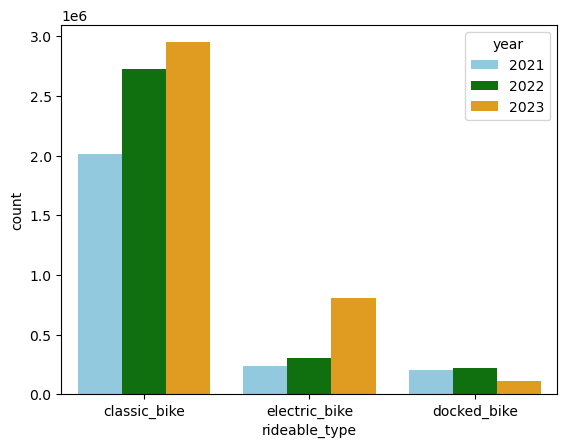

In [21]:
Palette = {2021: 'skyblue', 2022: 'green', 2023: 'orange'}
sns.countplot(data=F_data,x='rideable_type',hue='year', palette=Palette)

<Axes: xlabel='member_casual', ylabel='count'>

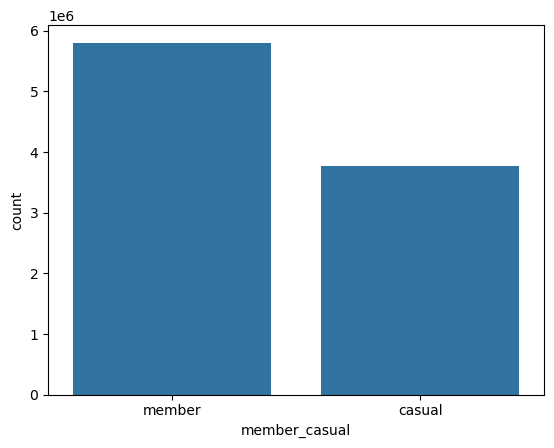

In [10]:
sns.countplot(F_data, x = 'member_casual')

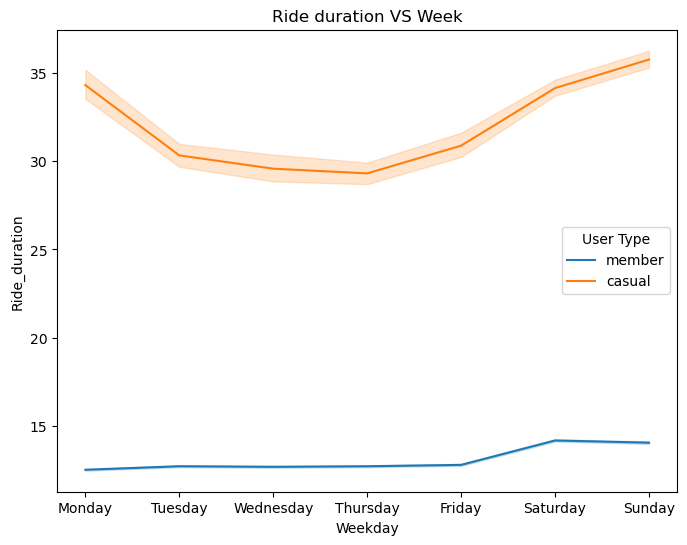

In [11]:

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] ## reorder x axis
# Convert 'Weekday' column to a categorical type with the specified order
F_data['Weekday'] = pd.Categorical(F_data['Weekday'], categories=weekday_order, ordered=True)
plt.figure(figsize=(8,6))
plt.title ('Ride duration VS Week')
sns.lineplot(data= F_data, x= 'Weekday' , y= 'Ride_duration', hue= 'member_casual')
plt.legend(title='User Type', loc='center right')
plt.show()